In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./anime_cleaned.csv')
df = df.sort_values(by=['aired_from_year'])

df = df.drop(columns=['title_synonyms', 'image_url', 'episodes', 'status', 'rating', 'duration', 
                 'broadcast', 'related', 'producer', 'airing', 'aired', 'aired_string', 
                 'licensor', 'members', 'favorites', 'premiered'])

# Anime Ratings - By Source
## Purpose
So I've always been curious about the ratings of anime depending on source. As a predominantly light novel reader to anime reader, I wondered to myself: ~~"are my tastes indeed superior to these plebians"~~ "What has consistently good source material that I can trust?"

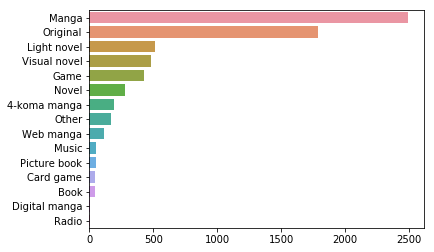

In [3]:
# Let's start with the genres

df.sort_values(by=['aired_from_year', 'source'])
source = df['source'].value_counts()
fig = plt.figure()
ax = fig.add_subplot(111)

sns.barplot(x=source.values, y=source.index, orient="h")

## Let's Graph It!
Surely, nothing can go wrong!

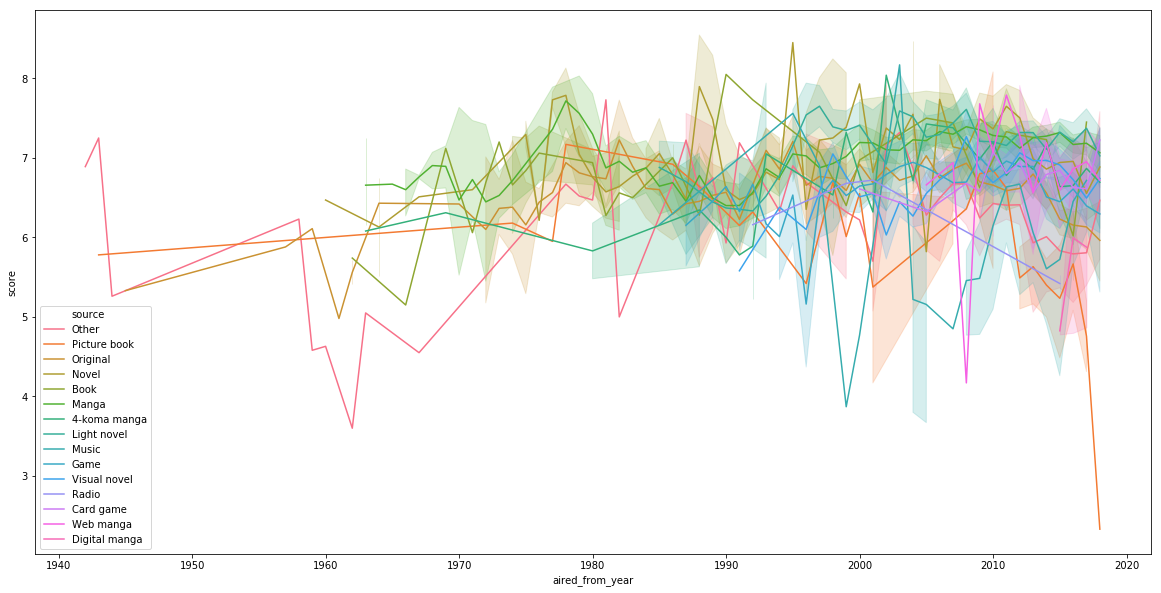

In [4]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x="aired_from_year", y="score", hue="source", data=df)

# I have made a dire mistake

## Cleaning
So first let's actually decide to combine a few bits and pieces. As you notice, we actually have a fair bit of repeats with mangas, and we have a few sources that aren't quite... significant.

We're going to combine Picture Book, Music, Radio, and Card Games into 'Other', putting all of the manga into 'Manga', and adding 'Novels' into 'Book

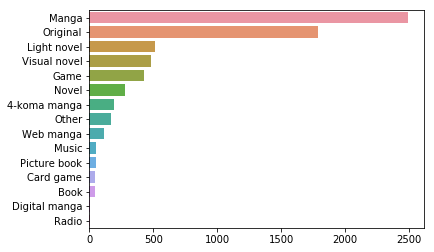

In [5]:
sns.barplot(x=source.values, y=source.index, orient="h")

In [23]:
def clean_source(data):
    # One way mapping
    mapping = {'Picture book': 'Other', 'Novel': 'Book', '4-koma manga': 'Manga',  'Music': 'Other', 'Radio': 'Other', 'Card game': 'Other', 'Web manga': 'Manga', 'Digital Manga': 'Manga', 'Digital manga': 'Manga'}
    if data in mapping:
        return mapping[data]
    else:
        return data
    

df['source'] = df['source'].apply(clean_source)
df['source'].unique()

array(['Other', 'Original', 'Book', 'Manga', 'Light novel', 'Game',
       'Visual novel'], dtype=object)

### Results
Now let's see how it looks.

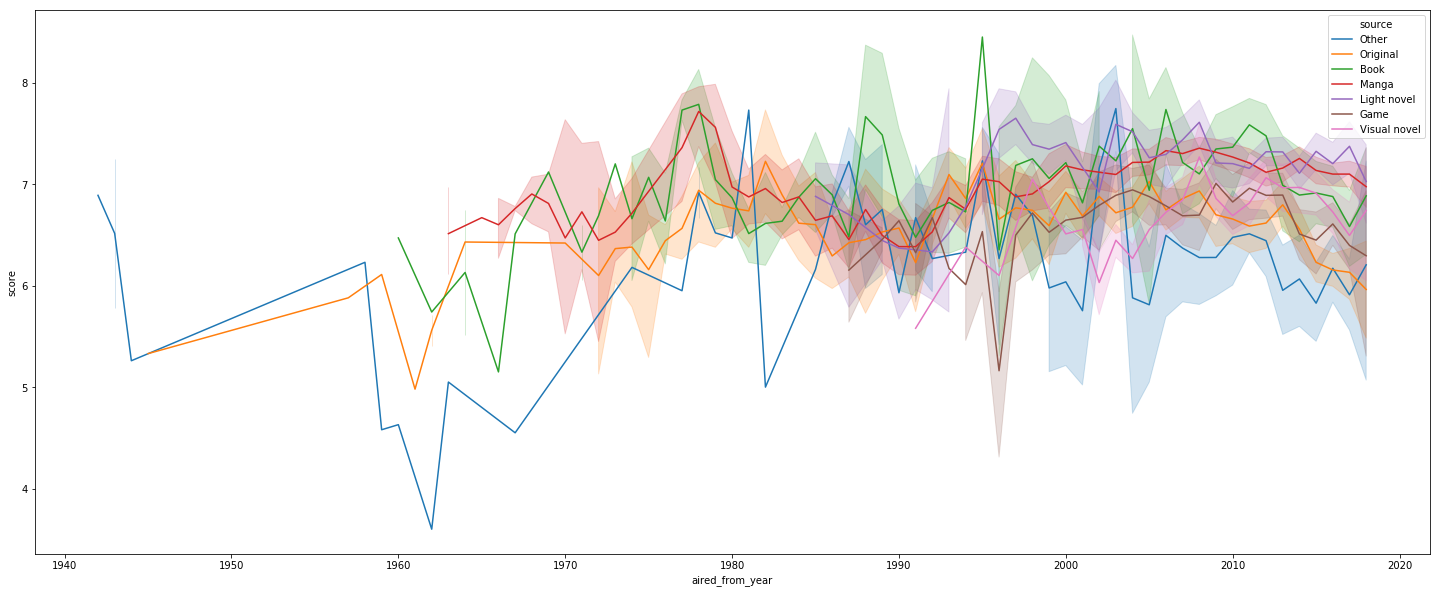

In [7]:
plt.figure(figsize=(25,10))
ax = sns.lineplot(x="aired_from_year", y="score", hue="source", data=df)

Marginally better, but still cluttered. Maybe if we seperate things just a bit...

## Seperation By Decades
Rather than that jumbled up mess, let's do it by decades. Each decade tends to say a lot about the atmosphere at the time.

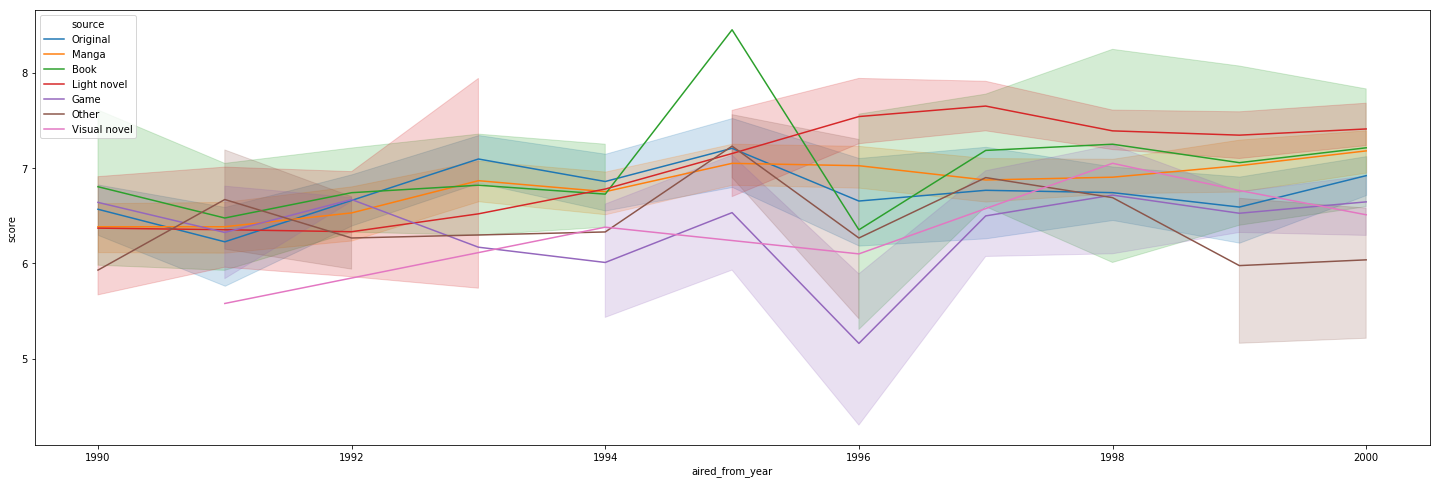

In [27]:
plt.figure(figsize=(25,8))
ax = sns.lineplot(x="aired_from_year", y="score", hue="source", data=df[(df['aired_from_year'] >= 1990) & (df['aired_from_year'] <= 2000)])

### 1990 - 2000 Observations
- Game-based anime didn't seem to fare well at the time. 
- Books and light novel reigned supreme, though books had a lot of variation going on.
- I expected Originals to have a higher median score due to the current era. Nostalgia hits like a truck.
- With home consoles becoming a thing, visual novels have begun.
- 1996 had a terrible game adaptation?

In [9]:
df[(df['aired_from_year'] > 1994) & (df['aired_from_year'] < 1996) & (df['source'] == 'Book')]

,anime_id,title,title_english,title_japanese,type,source,score,scored_by,rank,popularity,background,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
354,2559,Romeo no Aoi Sora,Romeo and the Black Brothers,ロミオの青い空,TV,Book,8.45,7943,134.0,2528,Romeo no Aoi Sora is based on the 1941 German ...,Nippon Animation,"Adventure, Drama, Historical, Slice of Life","['""Sora e..."" by Hiroko Kasahara']","['""Si Si Ciao -Romana no Oka de-"" by Hiroko Ka...",23.0,1995.0


### Misc Notes
Huh, what's with those odd gaps? Looks like there were times where there was only one available source. During the 90s, anime wasn't anywhere as common as it is now.

In [17]:
df[(df['aired_from_year'] == 1996) & (df['source'] == 'Game')]

,anime_id,title,title_english,title_japanese,type,source,score,scored_by,rank,popularity,background,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
3005,1820,Power Dolls,NaN,パワードール,OVA,Game,5.51,417,8360.0,7984,NaN,OLM,"Action, Adventure, Mecha, Sci-Fi",[],"['#1: ""Heaven"" by Kaori Moriwaka (ep 1)', '#2:...",25.0,1996.0
4914,3816,Idol Fight Suchie-Pai 2,Idol Fighter Su-Chi-Pai,アイドルファイト スーチーパイ２,OVA,Game,4.27,302,9419.0,8842,NaN,Daume,"Action, Ecchi",[],[],30.0,1996.0
2502,1560,Choujin Gakuen Gowcaizer: The Voltage Fighters,Voltage Fighter Gowcaizer,超人学園ゴウカイザー ＴＨＥ ＶＯＬＴＡＧＥ ＦＩＧＨＴＥＲＳ,OVA,Game,5.10,862,8939.0,6774,NaN,J.C.Staff,"Action, Sci-Fi, Ecchi, Martial Arts, Shounen",[],"['#1: ""Taiyou no Akai Namida: New Generation H...",30.0,1996.0
5435,2263,Sonic★the★Hedgehog,Sonic the Hedgehog: The Movie,ソニック★ザ★ヘッジホッグ,OVA,Game,6.86,6194,4087.0,3740,NaN,Studio Pierrot,"Adventure, Comedy, Sci-Fi, Shounen",[],"['""Look-a-Like"" by Riu Konaka']",30.0,1996.0
2294,2792,Panzer Dragoon,NaN,パンツァードラグーン,OVA,Game,3.21,744,9509.0,7529,NaN,Production I.G,"Adventure, Fantasy",[],[],27.0,1996.0
3448,2462,Toushinden,Battle Arena Toshinden,闘神伝,OVA,Game,5.36,1432,8599.0,6139,NaN,J.C.Staff,"Action, Martial Arts",[],"['""Makenaide Fly Away"" by Hikami Kyoko']",27.0,1996.0
997,2782,Fire Emblem,Fire Emblem,ファイアーエムブレム,OVA,Game,5.82,3391,7756.0,4206,NaN,Studio Fantasia,"Action, Adventure, Fantasy, Magic, Shounen",[],[],27.0,1996.0


### Misc Notes
Panzer Dragoon, one of the rarest Dreamcast games, seemed to have bombed. Game adaptations as a whole were pretty weak, despite Nintendo and Sega's attempts. The console wars were in full swing at the time, so it's to be expected.

Also good to know there was a Fire Emblem anime. Did not know that. I informed my Discord group immediately in order to make fun of my Fire Emblem fan friends.

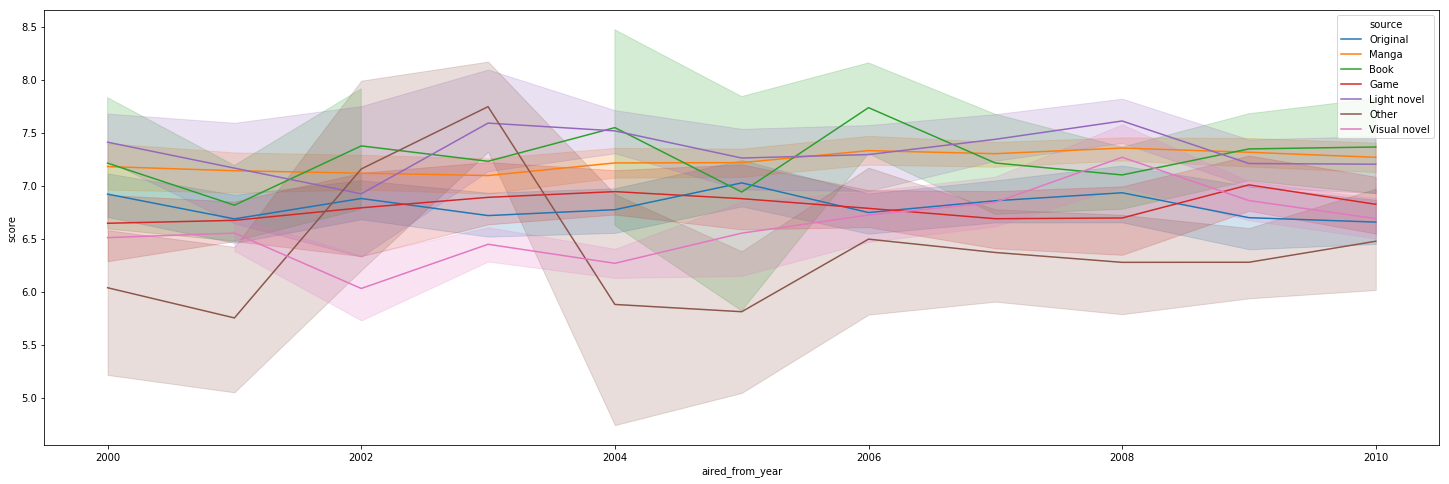

In [28]:
plt.figure(figsize=(25,8))
ax = sns.lineplot(x="aired_from_year", y="score", hue="source", data=df[(df['aired_from_year'] >= 2000) & (df['aired_from_year'] <= 2010)])

### 2000 - 2010 Observations
- This was around the time where there were bits and pieces of odd "Other" anime, with creating anime become more accessible. 2004 looks like it was hit pretty hard.
- Books and Light Novel remain consistent. The theatre of the mind seems strong.
- Manga has begun fighting on even grounds.
- What the heck happened with 'Other' at around 2003 and 2040?
- There was a 'Book' at around 2004 that went nuts.

In [14]:
df[(df['aired_from_year'] == 2003) & (df['source'] == 'Other')]

,anime_id,title,title_english,title_japanese,type,source,score,scored_by,rank,popularity,background,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
2425,731,Interstella5555: The 5tory of The 5ecret 5tar ...,NaN,インターステラ5555,Music,Other,8.17,25557,349.0,1751,NaN,Toei Animation,"Adventure, Drama, Music, Sci-Fi","['""One More Time"" by Daft Punk']","['""Aerodynamic (Daft Punk Remix)"" by Daft Punk']",67.0,2003.0
1404,1303,The Animatrix,The Animatrix,アニマトリックス,OVA,Other,7.32,24942,2364.0,1514,The film won the 2003 Annie Award for Best Ani...,"Madhouse, Studio 4°C","Action, Drama, Sci-Fi",[],[],10.0,2003.0


In [15]:
df[(df['aired_from_year'] == 2004) & (df['source'] == 'Other')]

,anime_id,title,title_english,title_japanese,type,source,score,scored_by,rank,popularity,background,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
6035,669,Kujibiki Unbalance,NaN,くじびきアンバランス,OVA,Other,6.17,4363,6869.0,3814,NaN,Palm Studio,"Comedy, Romance, School","['""Kujibiki Unbalance (くじびきアンバランス)"" by UNDER17']","['""Kagayaki Cyalume (かがやきサイリューム)"" by UNDER17']",25.0,2004.0
2019,36765,Scary,NaN,SCARY,Music,Other,3.80,25,11980.0,14002,NaN,pH Studio,"Music, Sci-Fi",[],[],4.0,2004.0
5215,3821,Portable Kuukou,Portable Airport,ポータブル空港,Music,Other,5.72,957,7952.0,7052,NaN,Studio Ghibli,"Sci-Fi, Music, Space",[],[],3.0,2004.0
5209,4689,Kaze no Toori Michi,The Path of Wind,カゼノトオリミチ,Music,Other,6.14,1039,6963.0,6605,NaN,"Studio Ghibli, Ajia-Do",Music,[],[],5.0,2004.0
423,166,Samurai 7,Samurai 7,サムライセブン,TV,Other,7.57,44550,1438.0,973,NaN,Gonzo,"Historical, Mecha, Samurai, Sci-Fi","['""UNLIMITED"" by Nanase Aikawa']","['""Fuhen (普遍)"" by Rin&#039;']",26.0,2004.0


### Misc Notes
Oh, Instella5555. That's a classic. During 2004, they also tried to cash in on some music-sci-space anime, which... didn't quite make it. There's not a lot of 'Other's out there, so we can expect a lot of skews.

Also, Kujibiki Unbalance? That's an anime within an anime. That's an odd source to have. Samurai 7, which took from the Samurai Seven film, has a pretty solid rating.

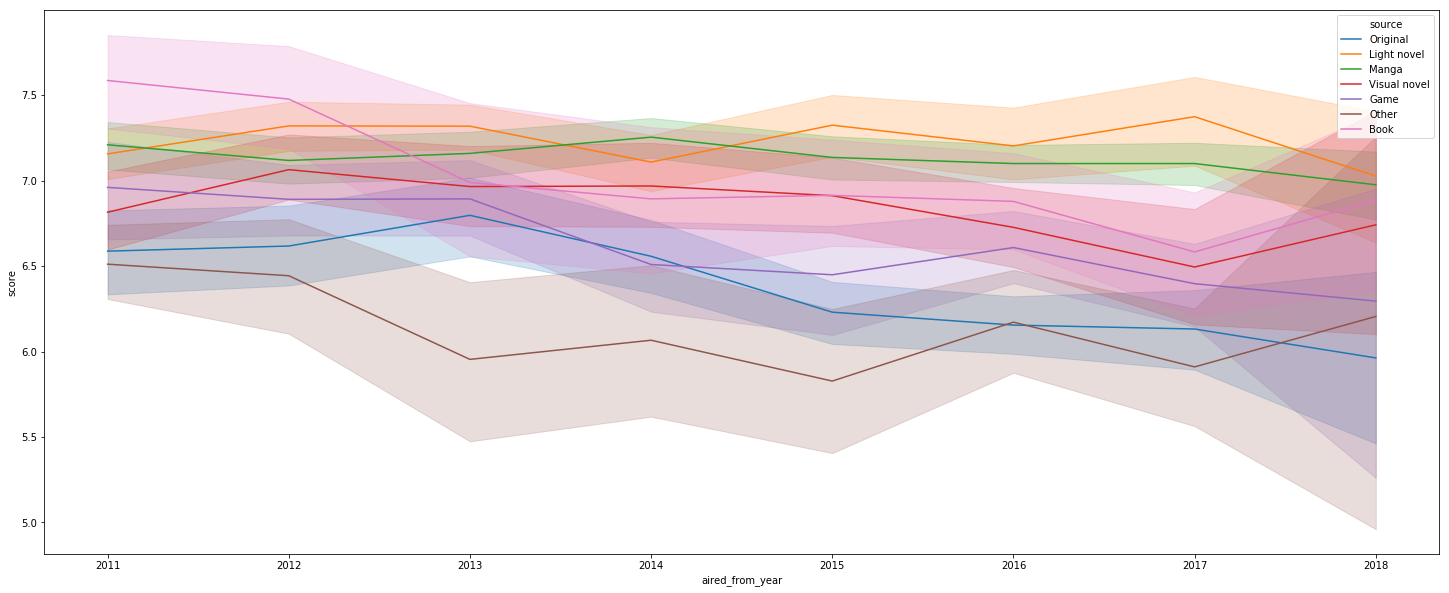

In [26]:
plt.figure(figsize=(25,10))
ax = sns.lineplot(x="aired_from_year", y="score", hue="source", data=df[df['aired_from_year']> 2010])

### 2010 - Current Observations
- The "Other"s was ALL over the place by 2018! Whoa!
- Light novels continue to dominate, with books going down in popularity. Manga has taken its place.

In [18]:
df[(df['aired_from_year'] == 2018) & (df['source'] == 'Other') ]

,anime_id,title,title_english,title_japanese,type,source,score,scored_by,rank,popularity,background,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
4840,36531,Shinkansen Henkei Robo Shinkalion The Animation,NaN,新幹線変形ロボ シンカリオン THE ANIMATION,TV,Other,6.06,212,7219.0,8080,NaN,OLM,"Action, Kids, Mecha, Sci-Fi","['""Shinka Riron (進化理論)"" by BOYS AND MEN']","['""Go One Step Ahead"" by Keisuke Murakami (eps...",24.0,2018.0
6623,36856,Tomica Hyper Rescue Drive Head: Kidou Kyuukyuu...,NaN,トミカハイパーレスキュー ドライブヘッド 機動救急警察 (2018),ONA,Other,5.71,7,12466.0,13145,NaN,OLM,"Adventure, Mecha, Police, Sci-Fi",[],[],15.0,2018.0
68,36847,Nanatsu no Bitoku,The Seven Heavenly Virtues,七つの美徳,TV,Other,5.20,4722,8835.0,2533,NaN,Bridge,"Ecchi, Fantasy","['""Psychomachia"" by Yousei Teikoku']",[],5.0,2018.0
6663,37405,Dokidoki Little Ooyasan,NaN,dokidokiりとる大家さん,OVA,Other,9.52,33,NaN,10273,NaN,Collaboration Works,Hentai,[],[],30.0,2018.0
4396,36517,Ninja Batman,Batman Ninja,ニンジャバットマン,OVA,Other,6.65,3330,4976.0,2926,Note: The movie was released digitally in the ...,Kamikaze Douga,"Action, Martial Arts, Samurai",[],[],85.0,2018.0
4695,35656,Oshiri Tantei,NaN,おしりたんてい,TV,Other,2.33,3,11659.0,10713,NaN,Toei Animation,"Mystery, Comedy, Kids, Fantasy",[],[],0.0,2018.0
1397,34863,Zoku Touken Ranbu: Hanamaru,NaN,続 刀剣乱舞-花丸-,TV,Other,7.38,2663,2140.0,3170,NaN,Doga Kobo,"Action, Comedy, Drama, Fantasy, Historical, Sl...","['#01: ""Hanamaru Shirushi no Hi no Moto de (花丸...","['#01: ""Ten to Koyomi (天と暦)"" by Higekiri (Nats...",24.0,2018.0
1304,31111,Nisshin Seifun Group CM,NaN,日清製粉グループCM,Special,Other,6.15,315,6938.0,8784,NaN,Studio Ghibli,"Kids, Slice of Life",[],[],0.5,2018.0
1234,34607,Lostorage Conflated WIXOSS,NaN,Lostorage conflated WIXOSS,TV,Other,7.07,1279,3311.0,3235,NaN,J.C.Staff,"Game, Psychological","['""UNLOCK"" by Yuka Iguchi']","['""I"" by Cyua']",23.0,2018.0
5494,37172,Nanatsu no Bitoku Specials,NaN,七つの美徳,Special,Other,5.98,60,7401.0,6200,NaN,Bridge,"Ecchi, Fantasy",[],[],5.0,2018.0


In [21]:
df[(df['aired_from_year'] == 2012) & (df['source'] == 'Book') & (df['score'] > 8)]

,anime_id,title,title_english,title_japanese,type,source,score,scored_by,rank,popularity,background,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
1141,13125,Shinsekai yori,From the New World,新世界より,TV,Book,8.49,157863,111.0,114,NaN,A-1 Pictures,"Sci-Fi, Mystery, Horror, Psychological, Supern...","['""Yuki ni Saku Hana (雪に咲く花)"" by Maria Akizuki...","['#1: ""Wareta Ringo (割れたリンゴ)"" by Saki Watanabe...",22.0,2012.0
1829,11741,Fate/Zero 2nd Season,Fate/Zero Season 2,フェイト/ゼロ 2ndシーズン,TV,Book,8.66,313188,54.0,81,NaN,ufotable,"Action, Supernatural, Magic, Fantasy","['""to the beginning"" by Kalafina (eps 1-4, 7-1...","['#1: ""Sora wa Takaku Kaze wa Utau (空は高く風は歌う)""...",24.0,2012.0
6122,12189,Hyouka,Hyouka,氷菓,TV,Book,8.15,241642,372.0,73,The first episode received an early screening ...,Kyoto Animation,"Mystery, School, Slice of Life","['#1: ""Yasashisa no Riyuu (優しさの理由)"" by ChouCho...","['#1: ""Madoromi no Yakusoku (まどろみの約束)"" by Sato...",25.0,2012.0


### Misc Notes
That's... a little outdated. That's odd. Dokidoki Little Ooyasan is around 7 right now, and it's also explicit. Current data looks outdated. Oshiri Tantei, at a 2.33? Geez.

Also, Fate/Zero is based on a visual novel, yet it's considered a book? That would be an error from the site's part.